# Libraries

In [2]:
#crypto intraday trading 
import yfinance as yf
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime as dt
import tensorflow as tf
import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import tensorflow_probability as tfp
import tensorflow.compat.v2.feature_column as fc
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Dropout, BatchNormalization, Concatenate
from keras import optimizers
from keras.utils import plot_model
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


# Dataset Creation

In [3]:
#these are the tickers that trade on on my site
tickers = 'BTC-USD ETH-USD DOGE-USD LTC-USD BCH-USD ETC-USD'
data = yf.download(tickers = tickers.upper(),period = '1mo',interval = '2m')
df = data.drop(columns = ['Close','Open','Volume','High','Low']).dropna()
df['SM3','BCH-USDsma3'] = df['Adj Close','BCH-USD'].rolling(window=3).mean()
df['SM3','ETH-USDsma3'] = df['Adj Close','ETH-USD'].rolling(window=3).mean()
df['SM3','BTC-USDsma3'] = df['Adj Close','BTC-USD'].rolling(window=3).mean()
df['SM3','DOGE-USDsma3'] = df['Adj Close','DOGE-USD'].rolling(window=3).mean()
df['SM3','ETC-USDsma3'] = df['Adj Close','ETC-USD'].rolling(window=3).mean()
df['SM3','LTC-USDsma3'] = df['Adj Close','LTC-USD'].rolling(window=3).mean()
df['SM9','BCH-USDsma9'] = df['Adj Close','BCH-USD'].rolling(window=9).mean()
df['SM9','ETH-USDsma9'] = df['Adj Close','ETH-USD'].rolling(window=9).mean()
df['SM9','BTC-USDsma9'] = df['Adj Close','BTC-USD'].rolling(window=9).mean()
df['SM9','DOGE-USDsma9'] = df['Adj Close','DOGE-USD'].rolling(window=9).mean()
df['SM9','ETC-USDsma9'] = df['Adj Close','ETC-USD'].rolling(window=9).mean()
df['SM9','LTC-USDsma9'] = df['Adj Close','LTC-USD'].rolling(window=9).mean()
df['SM9','BCH-USDsma15'] = df['Adj Close','BCH-USD'].rolling(window=15).mean()
df['SM9','ETH-USDsma15'] = df['Adj Close','ETH-USD'].rolling(window=15).mean()
df['SM9','BTC-USDsma15'] = df['Adj Close','BTC-USD'].rolling(window=15).mean()
df['SM9','DOGE-USDsma15'] = df['Adj Close','DOGE-USD'].rolling(window=15).mean()
df['SM9','ETC-USDsma15'] = df['Adj Close','ETC-USD'].rolling(window=15).mean()
df['SM9','LTC-USDsma15'] = df['Adj Close','LTC-USD'].rolling(window=15).mean()
df = df.dropna()
print('Which Crypto are you wanting to trade? (BTC-USD,ETH-USD,DOGE-USD,LTC-USD,BCH-USD,ETC-USD)')
target = input('Crypto: ')
df['Target','target'] = df['Adj Close',target.upper()].shift(-1)
df = df.drop(target.upper(),axis=1,level=1)
df.columns = df.columns.droplevel(0)
df = df.dropna()
df

[*********************100%***********************]  6 of 6 completed
Which Crypto are you wanting to trade? (BTC-USD,ETH-USD,DOGE-USD,LTC-USD,BCH-USD,ETC-USD)
Crypto: btc-usd


,BCH-USD,DOGE-USD,ETC-USD,ETH-USD,LTC-USD,BCH-USDsma3,ETH-USDsma3,BTC-USDsma3,DOGE-USDsma3,ETC-USDsma3,...,DOGE-USDsma9,ETC-USDsma9,LTC-USDsma9,BCH-USDsma15,ETH-USDsma15,BTC-USDsma15,DOGE-USDsma15,ETC-USDsma15,LTC-USDsma15,target
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-06-29 08:26:00+01:00,220.700607,0.002317,5.788684,223.875595,41.240410,220.480016,223.681117,9102.750651,0.002316,5.781078,...,0.002313,5.774451,41.138357,220.323715,223.416619,9093.778125,0.002314,5.774713,41.138994,9098.499023
2020-06-29 08:28:00+01:00,220.395218,0.002318,5.779928,223.815704,41.183937,220.531281,223.858053,9105.938477,0.002318,5.784125,...,0.002314,5.774993,41.153746,220.300381,223.407803,9093.497461,0.002314,5.774632,41.135463,9097.382812
2020-06-29 08:30:00+01:00,220.313538,0.002314,5.775959,223.552231,41.167366,220.469788,223.747843,9105.605143,0.002316,5.781524,...,0.002314,5.775239,41.157626,220.304947,223.404047,9093.589648,0.002314,5.774508,41.137269,9095.221680
2020-06-29 08:32:00+01:00,220.749390,0.002312,5.784371,223.554474,41.198494,220.486048,223.640803,9097.034505,0.002314,5.780086,...,0.002314,5.777112,41.160080,220.319212,223.381186,9092.739714,0.002314,5.775162,41.139163,9093.240234
2020-06-29 08:34:00+01:00,220.879791,0.002313,5.797961,223.574631,41.239799,220.647573,223.560445,9095.281576,0.002313,5.786097,...,0.002314,5.780228,41.172796,220.344475,223.384839,9091.643490,0.002313,5.776558,41.144462,9096.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-29 07:44:00+01:00,291.452911,0.003244,7.470675,321.971741,56.484173,291.612854,321.747650,11016.266276,0.003241,7.458398,...,0.003239,7.448052,56.322723,290.594560,320.456958,11010.322917,0.003238,7.447638,56.260753,11021.168945
2020-07-29 07:46:00+01:00,291.714874,0.003240,7.476006,321.840607,56.486485,291.601756,321.811422,11016.985026,0.003241,7.467582,...,0.003239,7.451345,56.350700,290.701099,320.621250,11011.425586,0.003239,7.448822,56.282180,11019.771484
2020-07-29 07:48:00+01:00,291.758881,0.003244,7.479486,321.690125,56.508987,291.642222,321.834157,11019.597331,0.003243,7.475389,...,0.003239,7.454455,56.383438,290.797695,320.778151,11012.143099,0.003239,7.450502,56.303323,11014.902344


# Feature Optimization

Train r squared score: 0.9999178307145715
Test r squared score: 0.9996693865818277


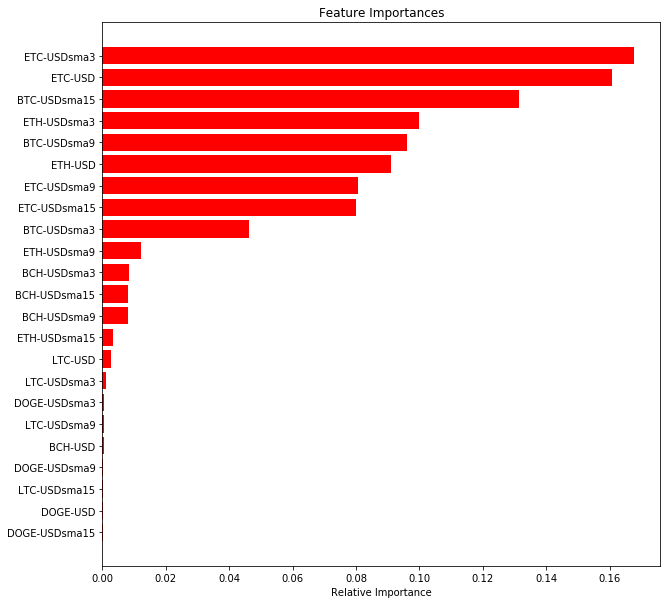

In [4]:
X = df.loc[:,df.columns!='target']
Y = df['target']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=50,test_size=0.2)
rfr = RandomForestRegressor(random_state=50,oob_score=True,max_features='sqrt')
rfr.fit(X_train,Y_train)
y_rfr_pred = rfr.predict(X_test)
print('Train r squared score:',r2_score(Y_train,rfr.predict(X_train)))
print('Test r squared score:',r2_score(Y_test,rfr.predict(X_test)))
features = X_train.columns
importances = rfr.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices],color='r',align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Training,Testing,Validation Data for Neural Network

In [5]:
import random
feature1 = target.upper()+'sma3'
#feature2 = target.upper()+'sma9'
feature3 = target.upper()+'sma15'
#new_features = [feature1,feature2,feature3]
new_features = [feature1,feature3]
###override the features picked by the random forrest classifier because they were not the best features
#new_features = features[indices][-2:]
#new_features = target.upper()
print(new_features)
X = df[new_features]
Y = df[['target']]
random.seed(100)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=50,test_size=0.2)
X_val,X_test,Y_val,Y_test = train_test_split(X_test,Y_test,random_state=50,test_size=0.5)

#number of steps function given the batch size
def num_steps(length: int,batch_size = int):
    return length//batch_size+1
batch_size = 32
num_steps(len(X_train), batch_size)

['BTC-USDsma3', 'BTC-USDsma15']


448

# Neural Network Model [4 layers, leaky relu act fxn, adam optimizer, mean square error & mean absolute percentage error as the loss metric]

In [6]:
def stock_predictor_model(x_train):
    model = Sequential()
    model.add(Dense(100, input_dim=x_train.shape[1],
                    activation=tf.nn.leaky_relu,
                    kernel_initializer='he_normal'))
    model.add(Dense(60, input_dim=100,
                    activation=tf.nn.leaky_relu,
                    kernel_initializer='he_normal'))
    model.add(Dense(30, input_dim=60,
                activation=tf.nn.leaky_relu,
                kernel_initializer='he_normal'))
    model.add(Dense(1, activation=tf.nn.leaky_relu,
                    kernel_initializer='he_normal'))
    model.compile(loss='mean_squared_error',
                  optimizer='adam',
                  metrics=['mape'])
    return model

In [7]:
model = stock_predictor_model(X_train)
#training the model
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
history = model.fit(X_train, Y_train, 
                    validation_data=[X_val, Y_val],
                    batch_size=batch_size,
                    epochs=2,
                    verbose=1)

Train on 14308 samples, validate on 1789 samples
Epoch 1/2
14308/14308 [==============================] - 1s 96us/step - loss: 1752583.6997 - mape: 3.4858 - val_loss: 187.5883 - val_mape: 0.0857
Epoch 2/2
14308/14308 [==============================] - 1s 76us/step - loss: 236.6911 - mape: 0.1001 - val_loss: 182.1560 - val_mape: 0.0736


# Prediction Dataset to get the next price in the next five minutes

In [8]:
pred_tickers = 'BTC-USD ETH-USD DOGE-USD LTC-USD BCH-USD ETC-USD'
pred_data = yf.download(tickers = pred_tickers.upper(),period = '1mo',interval = '5m')
pred_df = pred_data.drop(columns = ['Close','Open','Volume','High','Low']).dropna()
pred_df['SM3','BCH-USDsma3'] = pred_df['Adj Close','BCH-USD'].rolling(window=3).mean()
pred_df['SM3','BTC-USDsma3'] = pred_df['Adj Close','BTC-USD'].rolling(window=3).mean()
pred_df['SM3','ETH-USDsma3'] = pred_df['Adj Close','ETH-USD'].rolling(window=3).mean()
pred_df['SM3','DOGE-USDsma3'] = pred_df['Adj Close','DOGE-USD'].rolling(window=3).mean()
pred_df['SM3','ETC-USDsma3'] = pred_df['Adj Close','ETC-USD'].rolling(window=3).mean()
pred_df['SM3','LTC-USDsma3'] = pred_df['Adj Close','LTC-USD'].rolling(window=3).mean()
pred_df['SM9','BCH-USDsma9'] = pred_df['Adj Close','BCH-USD'].rolling(window=9).mean()
pred_df['SM9','BTC-USDsma9'] = pred_df['Adj Close','BTC-USD'].rolling(window=9).mean()
pred_df['SM9','DOGE-USDsma9'] = pred_df['Adj Close','DOGE-USD'].rolling(window=9).mean()
pred_df['SM9','ETC-USDsma9'] = pred_df['Adj Close','ETC-USD'].rolling(window=9).mean()
pred_df['SM9','ETH-USDsma9'] = pred_df['Adj Close','ETH-USD'].rolling(window=9).mean()
pred_df['SM9','LTC-USDsma9'] = pred_df['Adj Close','LTC-USD'].rolling(window=9).mean()
pred_df['SM9','BCH-USDsma15'] = pred_df['Adj Close','BCH-USD'].rolling(window=15).mean()
pred_df['SM9','BTC-USDsma15'] = pred_df['Adj Close','BTC-USD'].rolling(window=15).mean()
pred_df['SM9','DOGE-USDsma15'] = pred_df['Adj Close','DOGE-USD'].rolling(window=15).mean()
pred_df['SM9','ETC-USDsma15'] = pred_df['Adj Close','ETC-USD'].rolling(window=15).mean()
pred_df['SM9','ETH-USDsma15'] = pred_df['Adj Close','ETH-USD'].rolling(window=15).mean()
pred_df['SM9','LTC-USDsma15'] = pred_df['Adj Close','LTC-USD'].rolling(window=15).mean()
pred_df.columns = pred_df.columns.droplevel(0)
pred_df

[*********************100%***********************]  6 of 6 completed


,BCH-USD,BTC-USD,DOGE-USD,ETC-USD,ETH-USD,LTC-USD,BCH-USDsma3,BTC-USDsma3,ETH-USDsma3,DOGE-USDsma3,...,DOGE-USDsma9,ETC-USDsma9,ETH-USDsma9,LTC-USDsma9,BCH-USDsma15,BTC-USDsma15,DOGE-USDsma15,ETC-USDsma15,ETH-USDsma15,LTC-USDsma15
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-06-29 07:55:00+01:00,220.745224,9102.708984,0.002318,5.781137,223.947937,41.236912,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-29 08:00:00+01:00,220.500839,9104.970703,0.002320,5.777016,223.730606,41.160309,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-29 08:05:00+01:00,220.126114,9080.470703,0.002312,5.775866,223.065567,41.050694,220.457392,9096.050130,223.581370,0.002317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-29 08:10:00+01:00,220.056732,9083.643555,0.002312,5.773741,223.121811,41.132446,220.227895,9089.694987,223.305995,0.002314,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-29 08:15:00+01:00,220.758331,9088.058594,0.002313,5.771750,223.163696,41.099209,220.313726,9084.057617,223.117025,0.002312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-29 07:30:00+01:00,290.394806,11004.135742,0.003238,7.442970,320.454041,56.324905,290.290517,11006.497396,320.162598,0.003237,...,0.003235,7.440647,319.178904,56.096019,289.417114,10978.681966,0.003239,7.434385,318.497353,55.998824
2020-07-29 07:35:00+01:00,291.471863,11013.073242,0.003239,7.440979,321.134827,56.345032,290.797689,11007.598307,320.654063,0.003239,...,0.003235,7.441922,319.502618,56.143105,289.592181,10982.512305,0.003238,7.435496,318.774821,56.036929
2020-07-29 07:40:00+01:00,291.366364,11011.249023,0.003241,7.461556,321.656036,56.432739,291.077677,11009.486003,321.081635,0.003239,...,0.003235,7.445106,319.940969,56.203115,289.765580,10985.583919,0.003238,7.438103,319.082886,56.078303


# Decision

In [9]:
pred_df = pred_df[new_features]
pred_features = pred_df.iloc[-1]
pred_features = np.array([[pred_features[0],pred_features[1]]])
#pred_features = np.array([[pred_features[0],pred_features[1],pred_features[2]]])
prediction = model.predict(pred_features)
print(f'The predicted stock price for {target} in the next five minutes is ${float(prediction[0])}.')
pred = yf.download(tickers = target.upper(),period = '1mo',interval = '5m')[['Adj Close']]
if float(prediction[0])>float(pred.iloc[-1:].values):
    print('Buy: ', float(prediction[0]), '>',float(pred.iloc[-1:].values),': PCT DIFF: ',(float(prediction[0] - float(pred.iloc[-1:].values))/float(pred.iloc[-1:].values)),'%')
else:
    print('Sell: ', float(prediction[0]), '<',float(pred.iloc[-1:].values),': PCT DIFF: ',(float(prediction[0] - float(pred.iloc[-1:].values))/float(pred.iloc[-1:].values)),'%')

The predicted stock price for btc-usd in the next five minutes is $10998.91015625.
[*********************100%***********************]  1 of 1 completed
Sell:  10998.91015625 < 11022.3525390625 : PCT DIFF:  -0.002126803940394913 %


# Check

In [10]:
print(df[['target']].tail(2))
print(pred.tail(2))

                                 target
Datetime                               
2020-07-29 07:50:00+01:00  11017.930664
2020-07-29 07:52:00+01:00  11020.523438
                              Adj Close
Datetime                               
2020-07-29 07:55:00+01:00  11019.757812
2020-07-29 07:56:19+01:00  11022.352539
